In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from lib.dataset_wrapper import Dataset
from lib import abx_utils

In [2]:
DATASETS_NAME = ["pb2007"]
DISTANCES = [
    {
        "art_params": {
            "metric": "euclidean",
            "weight": 1,
        }
    },
    {
        "cepstrum": {
            "metric": "euclidean",
            "weight": 1,
        },
    },
]

In [3]:
abx_matrices = {}

for distance in DISTANCES:
    distance_signature = abx_utils.get_distance_signature(distance)
    
    main_dataset = None
    datasets_lab = {}
    datasets_features = {}
    for dataset_name in DATASETS_NAME:
        dataset = Dataset(dataset_name)
        if main_dataset is None:
            main_dataset = dataset
        datasets_lab[dataset_name] = dataset.lab
        dataset_features = {}

        for feature_type in distance.keys():
            items_features = dataset.get_items_data(feature_type)
            dataset_features[feature_type] = items_features

        datasets_features[dataset_name] = dataset_features

    consonants = main_dataset.phones_infos["consonants"]
    vowels = main_dataset.phones_infos["vowels"]

    consonants_indexes = abx_utils.get_datasets_phones_indexes(
        datasets_lab,
        consonants,
        vowels,
    )

    abx_matrix = abx_utils.get_abx_matrix(consonants, consonants_indexes, datasets_features, distance, 50)
    abx_matrices[distance_signature] = abx_matrix

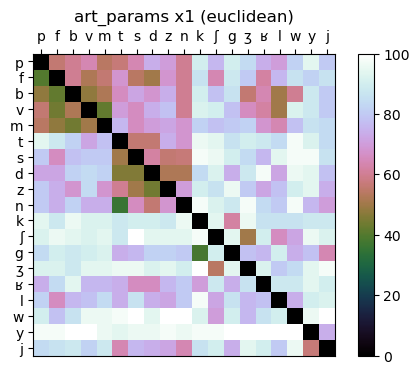

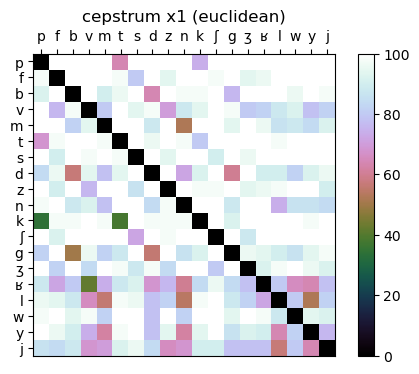

In [4]:
for distance_signature, abx_matrix in abx_matrices.items():
    plt.figure(dpi=100)
    ax = plt.subplot()
    ax.set_title(distance_signature)
    abx_utils.show_abx_matrix(ax, abx_matrix, consonants, main_dataset.phones_infos["notation"])
    plt.show()

art_params x1 (euclidean)
{'manner': 62.63333333333333, 'place': 81.0}
cepstrum x1 (euclidean)
{'manner': 95.1, 'place': 84.16666666666667}


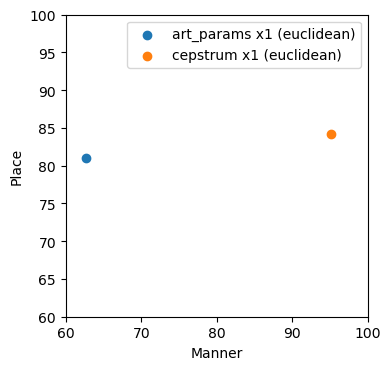

In [13]:
colors = {
    "art_params x1 (euclidean)": "tab:blue",
    "cepstrum x1 (euclidean)": "tab:orange",
}

plt.figure(dpi=100)

ax = plt.subplot(aspect="equal")
ax.set_xlim(60, 100)
ax.set_ylim(60, 100)
ax.set_xlabel("Manner")
ax.set_ylabel("Place")

# ax.set_title(distance_signature)

for distance_signature, abx_matrix in abx_matrices.items():
    print(distance_signature)    
    consonant_groups = main_dataset.phones_infos["consonant_groups"].copy()
    # consonant_groups["manner"] = [['f', 'v', 'm'], ['s', 'z', 'n'], ['s^', 'z^', 'r']]
    consonant_groups["place"] = [['f', 's', 's^'], ['v', 'z', 'z^']]
    # consonant_groups["place"] = [['p', 't', 'k'], ['b', 'd', 'g']]
    groups_score = abx_utils.get_groups_score(consonants, abx_matrix, consonant_groups)
    print(groups_score)
    ax.scatter(groups_score["manner"], groups_score["place"], c=colors[distance_signature], label=distance_signature)

ax.legend()
plt.show()